In [ ]:
import os
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = 'gdrive/My Drive/Colab Notebooks/desafio-codenation'
os.chdir(path)

##Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, recall_score, f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
%matplotlib inline
pd.options.display.max_columns = None
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
train = (pd.read_csv('datas2/train.csv')).drop('Unnamed: 0', axis=1)
test = pd.read_csv('datas2/test.csv')
answer = pd.DataFrame()

In [ ]:
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']

In [ ]:
num_features_train = train.dtypes[train.dtypes != 'object'].index
cat_features_train = train.dtypes[train.dtypes == 'object'].index

num_features_test = test.dtypes[test.dtypes != 'object'].index
cat_features_test = test.dtypes[test.dtypes == 'object'].index

### Análise exploratória dos dados

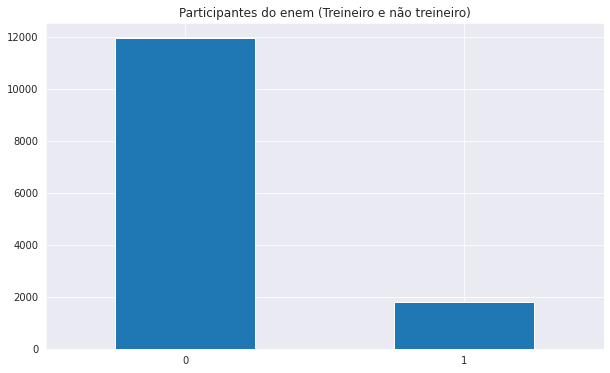

In [9]:
train['IN_TREINEIRO'].value_counts().plot(kind='bar')
plt.title('Participantes do enem (Treineiro e não treineiro)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
corr = pd.Series(np.abs(train[num_features_train].corr()['IN_TREINEIRO']).sort_values(ascending=False)[1:])

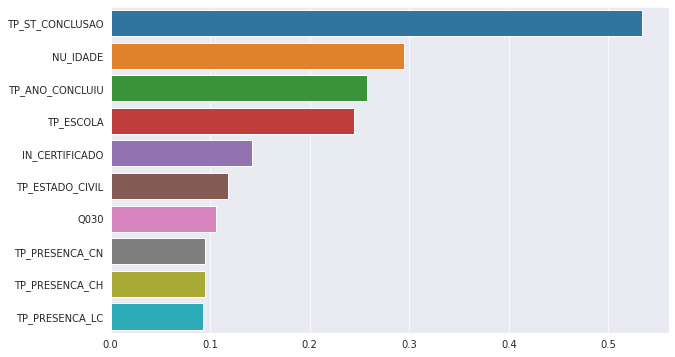

In [11]:
sns.barplot(x=corr.values[:10], y=corr.index[:10],  orient='h')
plt.show()

In [ ]:
features_selected = [c for c in corr.index[:4].values]

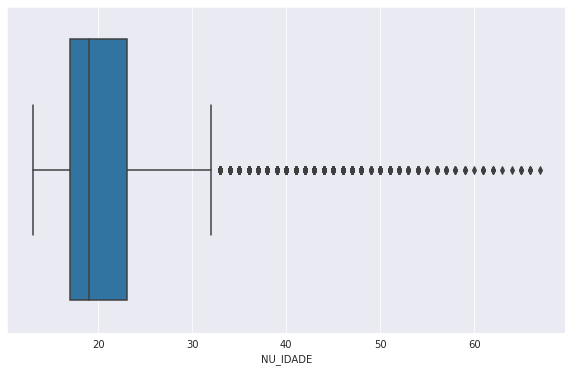

In [13]:
sns.boxplot(train[features_selected].iloc[:, 1])
plt.show()

In [ ]:
#train[features_selected].iloc[:, 2].value_counts()
#train[features_selected].iloc[:, 3].value_counts()

In [ ]:
X_train = train[features_selected].copy()
X_test = test[features_selected].copy()
y = train['IN_TREINEIRO']

In [ ]:
scaler_train = MinMaxScaler().fit(X_train)
X_scaled_train = scaler_train.transform(X_train)

In [ ]:
scaler_test = MinMaxScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)

In [18]:
X_resample, y_resample = SMOTE().fit_resample(X_scaled_train, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Validação

In [ ]:
classifiers = [
               KNeighborsClassifier(),
               SVC(kernel='rbf', C=0.025, probability=True),
               DecisionTreeClassifier(max_depth=5, random_state=0),
               AdaBoostClassifier(random_state=0, n_estimators=500),
               ExtraTreesClassifier(max_depth=5, n_estimators=500, random_state=0),
               GradientBoostingClassifier(n_estimators=500, random_state=0),
               RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)

]

In [20]:
list_roc = []
list_recall = []
list_f1 = []

clfs = []
for clf in classifiers:
    clf.fit(X_resample, y_resample)
    name = clf.__class__.__name__

    print('='*20)
    print(name)

    print('====Summary===')
    roc = cross_val_score(clf, X_resample, y_resample, cv=5, scoring='roc_auc').mean()
    recall = cross_val_score(clf, X_resample, y_resample, cv=5, scoring='recall').mean()
    f1 = cross_val_score(clf, X_resample, y_resample, cv=5, scoring='f1').mean()

    summary = f'ROC_AUC: {roc}, \nRecall Score: {recall} \nF1 Socre: {f1}\n'
    print(summary)

    list_roc.append(roc)
    list_recall.append(recall)
    list_f1.append(f1)
    clfs.append(name)

KNeighborsClassifier
====Summary===
ROC_AUC: 0.9952012799248997, 
Recall Score: 0.9814186710008039 
F1 Socre: 0.9887340317261467

SVC
====Summary===
ROC_AUC: 0.9998001652533605, 
Recall Score: 1.0 
F1 Socre: 0.9806699316255367

DecisionTreeClassifier
====Summary===
ROC_AUC: 0.9998001652533605, 
Recall Score: 1.0 
F1 Socre: 0.9914535300826943

AdaBoostClassifier
====Summary===
ROC_AUC: 0.9998001652533605, 
Recall Score: 1.0 
F1 Socre: 0.9914535300826943

ExtraTreesClassifier
====Summary===
ROC_AUC: 0.9998001652533606, 
Recall Score: 1.0 
F1 Socre: 0.9813544105630607

GradientBoostingClassifier
====Summary===
ROC_AUC: 0.9998001652533605, 
Recall Score: 1.0 
F1 Socre: 0.9914535300826943

RandomForestClassifier
====Summary===
ROC_AUC: 0.9998001652533605, 
Recall Score: 1.0 
F1 Socre: 0.9914535300826943



In [ ]:
df_clfs = pd.DataFrame({'ROC_AUC': list_roc, 'RECALL_SCORE': list_recall, 'F1_SCORE': list_f1}, index=clfs)

In [22]:
df_clfs

,ROC_AUC,RECALL_SCORE,F1_SCORE
KNeighborsClassifier,0.995201,0.981419,0.988734
SVC,0.999800,1.000000,0.980670
DecisionTreeClassifier,0.999800,1.000000,0.991454
AdaBoostClassifier,0.999800,1.000000,0.991454
ExtraTreesClassifier,0.999800,1.000000,0.981354
GradientBoostingClassifier,0.999800,1.000000,0.991454
RandomForestClassifier,0.999800,1.000000,0.991454


### Turning model

In [ ]:
random_grid = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [24]:
etres = ExtraTreesClassifier()
etres_random = RandomizedSearchCV(estimator=etres, param_distributions=random_grid, 
                               n_iter=100, cv=3, verbose=2, 
                               random_state=42, n_jobs=-1)
etres_random.fit(X_resample, y_resample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [25]:
etres_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [ ]:
pred = etres_random.predict(X_scaled_test)

### Evaluation

In [29]:
e_roc = roc_auc_score(pd.Series(y_resample).sample(4570), pred)
e_recall = recall_score(pd.Series(y_resample).sample(4570), pred)
e_f1 = f1_score(pd.Series(y_resample).sample(4570), pred)
e_summary =  f'ROC_AUC: {e_roc}, RECALL_SCORE: {e_recall}, F1_SCORE: {e_f1}'
print(e_summary)

ROC_AUC: 0.5020667579479973, RECALL_SCORE: 0.14075067024128687, F1_SCORE: 0.2111034955448938


In [ ]:
answer['IN_TREINEIRO'] = pred

In [ ]:
answer.to_csv('answer.csv', index=False, header=True)